In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, GRU

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [23]:
df = pd.read_csv('spg.csv')
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,6.37,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,5.15,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,4.68,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,3.60,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,6.21,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


In [17]:
df.head()

,temperature_2_m_above_gnd,total_precipitation_sfc,total_cloud_cover_sfc,generated_power_kw
0,2.17,0.0,0.0,454.10095
1,2.31,0.0,0.0,1411.99940
2,3.65,0.0,0.0,2214.84930
3,5.82,0.0,0.0,2527.60920
4,7.73,0.0,0.0,2640.20340


In [24]:
X = df[['temperature_2_m_above_gnd', 'total_precipitation_sfc', 'total_cloud_cover_sfc', 'shortwave_radiation_backwards_sfc',
'wind_speed_10_m_above_gnd',
'wind_direction_10_m_above_gnd',
'wind_speed_80_m_above_gnd',
'wind_direction_80_m_above_gnd',
'wind_speed_900_mb',
'wind_direction_900_mb',
'wind_gust_10_m_above_gnd',
'zenith',
'azimuth',
'mean_sea_level_pressure_MSL',
'snowfall_amount_sfc',
'high_cloud_cover_high_cld_lay',
'medium_cloud_cover_mid_cld_lay',
'low_cloud_cover_low_cld_lay',
'angle_of_incidence',
'relative_humidity_2_m_above_gnd']]
y = df[['generated_power_kw']]

In [25]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

Epoch 1/50
95/95 [==============================] - 2s 6ms/step - loss: 0.5697 - val_loss: 0.3526
Epoch 2/50
95/95 [==============================] - 0s 4ms/step - loss: 0.3031 - val_loss: 0.3067
Epoch 3/50
95/95 [==============================] - 0s 4ms/step - loss: 0.2740 - val_loss: 0.2857
Epoch 4/50
95/95 [==============================] - 0s 4ms/step - loss: 0.2598 - val_loss: 0.2805
Epoch 5/50
95/95 [==============================] - 0s 4ms/step - loss: 0.2481 - val_loss: 0.2587
Epoch 6/50
95/95 [==============================] - 0s 4ms/step - loss: 0.2371 - val_loss: 0.2503
Epoch 7/50
95/95 [==============================] - 0s 4ms/step - loss: 0.2274 - val_loss: 0.2471
Epoch 8/50
95/95 [==============================] - 0s 4ms/step - loss: 0.2206 - val_loss: 0.2441
Epoch 9/50
95/95 [==============================] - 0s 4ms/step - loss: 0.2129 - val_loss: 0.2302
Epoch 10/50
95/95 [==============================] - 0s 5ms/step - loss: 0.2075 - val_loss: 0.2268
Epoch 11/50
95/95 [

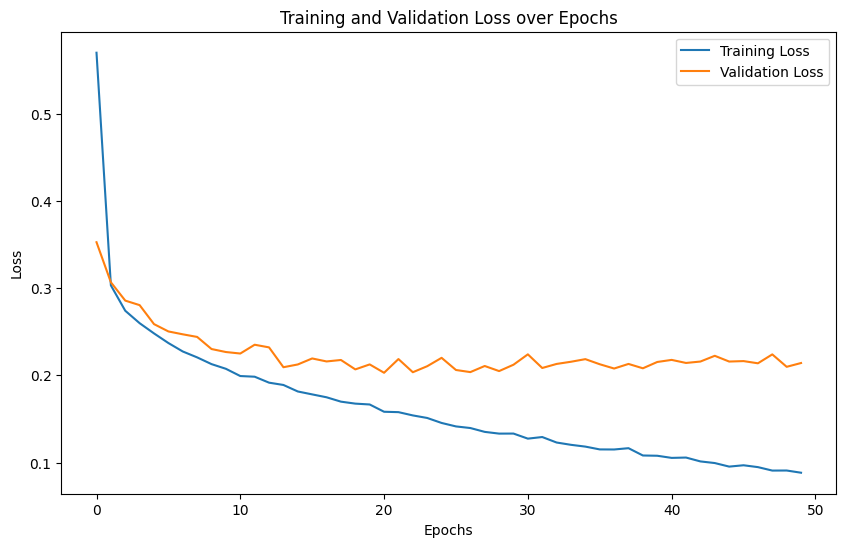

27/27 [==============================] - 0s 2ms/step - loss: 0.2022
Test Loss: 0.2022196501493454
27/27 [==============================] - 0s 2ms/step


In [26]:
time_steps = 3
features_count = X_scaled.shape[1]

sequences = []
target = []

for i in range(len(X_scaled) - time_steps):
    sequences.append(X_scaled[i:i + time_steps, :])
    target.append(y_scaled[i + time_steps])

X_sequences = np.array(sequences)
y_target = np.array(target)

X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_target, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, features_count)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

predictions_scaled = model.predict(X_test)

predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))



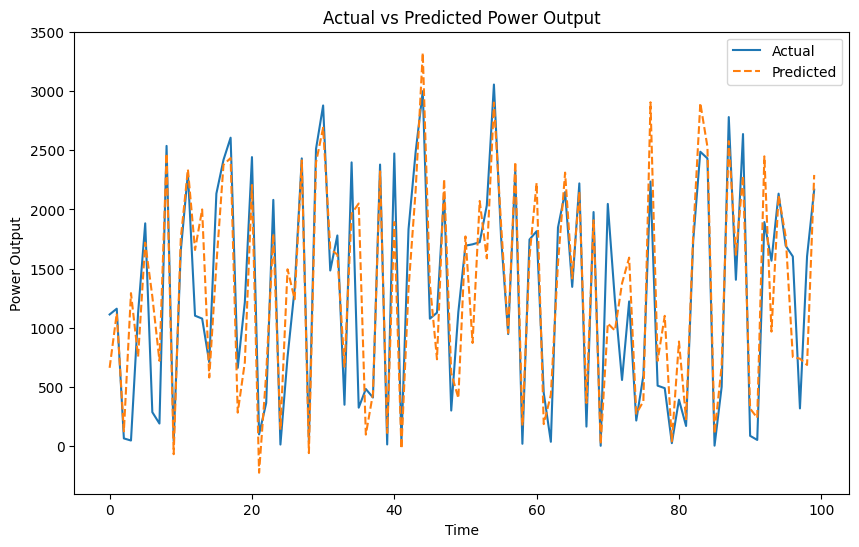

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual[:100], label='Actual')
plt.plot(predictions[:100], label='Predicted', linestyle='dashed')
plt.title('Actual vs Predicted Power Output')
plt.xlabel('Time')
plt.ylabel('Power Output')
plt.legend()
plt.show()

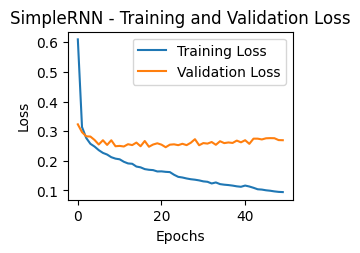

In [30]:
#rnn

model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(time_steps, features_count)))
model_rnn.add(Dense(1, activation='linear'))  # Adjust activation as needed
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

history_rnn = model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

plt.subplot(2, 2, 1)
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('SimpleRNN - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

27/27 [==============================] - 0s 2ms/step


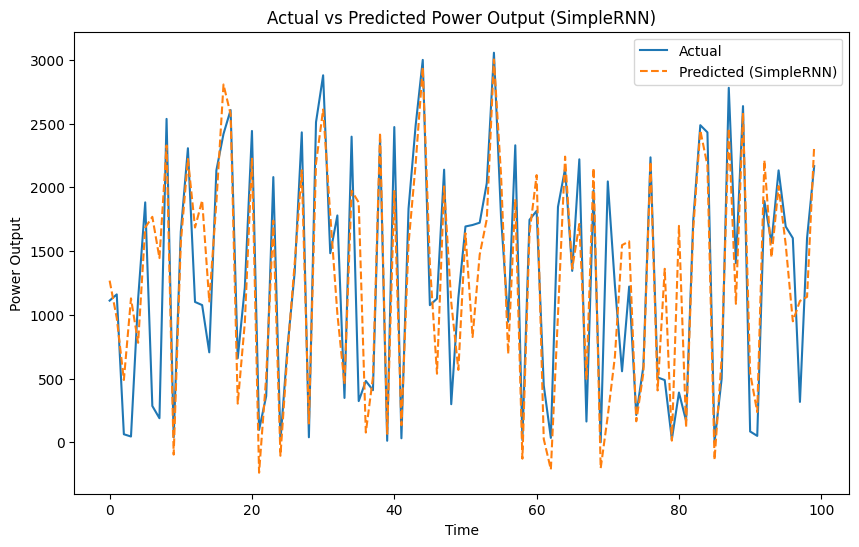

In [32]:
predictions_rnn_scaled = model_rnn.predict(X_test)
predictions_rnn = scaler_y.inverse_transform(predictions_rnn_scaled)

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual[:100], label='Actual')
plt.plot(predictions_rnn[:100], label='Predicted (SimpleRNN)', linestyle='dashed')
plt.title('Actual vs Predicted Power Output (SimpleRNN)')
plt.xlabel('Time')
plt.ylabel('Power Output')
plt.legend()
plt.show()

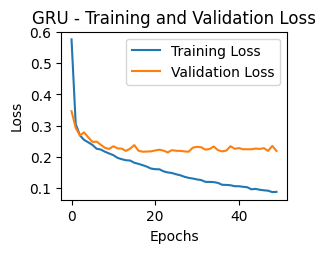

In [35]:
#gru

model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(time_steps, features_count)))
model_gru.add(Dense(1, activation='linear'))  # Adjust activation as needed
model_gru.compile(optimizer='adam', loss='mean_squared_error')

history_gru = model_gru.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

plt.subplot(2, 2, 2)
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('GRU - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

27/27 [==============================] - 0s 2ms/step


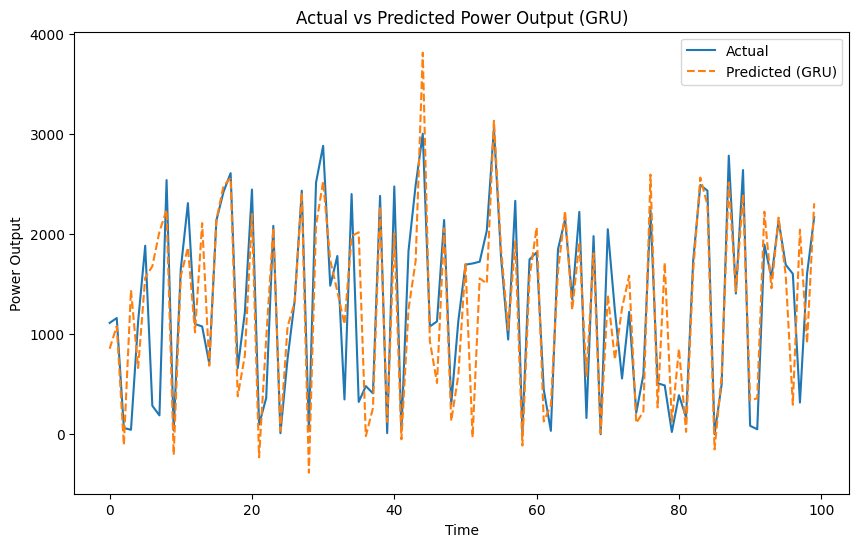

In [36]:
predictions_gru_scaled = model_gru.predict(X_test)
predictions_gru = scaler_y.inverse_transform(predictions_gru_scaled)

# Plot actual vs predicted values for GRU
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual[:100], label='Actual')
plt.plot(predictions_gru[:100], label='Predicted (GRU)', linestyle='dashed')
plt.title('Actual vs Predicted Power Output (GRU)')
plt.xlabel('Time')
plt.ylabel('Power Output')
plt.legend()
plt.show()